<a href="https://colab.research.google.com/github/DurgamEashwar/Machine-Learning-project/blob/main/Task_2_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import Libraries
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(" Libraries imported successfully.")

 Libraries imported successfully.


In [16]:
#Load the dataset
# Step 2: Load the dataset
df = pd.read_csv("/content/data.csv")
print("✅ Dataset loaded successfully.\n")

# Print basic information about the dataset
print("📊 Dataset Info:")
print(df.info())

# Display first 5 rows
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

✅ Dataset loaded successfully.

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  coun

In [17]:
# Step 3: Preprocessing

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop irrelevant columns
df.drop(['street', 'country', 'date'], axis=1, inplace=True)

# Check for missing values
print("\n🧼 Missing values in each column:")
print(df.isnull().sum())

# Drop duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\n🗃️ Dropped {before - after} duplicate rows.")

# One-hot encode 'city' and 'statezip'
df = pd.get_dummies(df, columns=['city', 'statezip'], drop_first=True)
print(f"\n✅ Data shape after encoding: {df.shape}")


🧼 Missing values in each column:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64

🗃️ Dropped 0 duplicate rows.

✅ Data shape after encoding: (4600, 132)


In [19]:
# Step 4: Define input features and target
X = df.drop('price', axis=1)
y = df['price']

print("\n Features and target defined.")
print(f" Number of features: {X.shape[1]}")


 Features and target defined.
 Number of features: 131


In [21]:
# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and test sets:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Data split into training and test sets:
Training samples: 3680
Test samples: 920


In [22]:
# Step 6: Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("\n✅ Linear Regression model trained successfully.")


✅ Linear Regression model trained successfully.


In [24]:
# Step 7: Predict and Evaluate (compatible version)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Model Performance:
Root Mean Squared Error (RMSE): 981726.28
R² Score: 0.0550


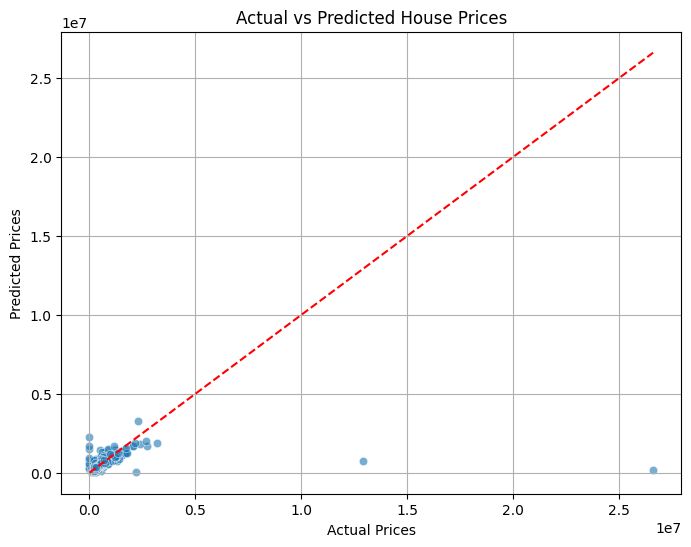

In [25]:
# Step 8: Visualize actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.grid(True)
plt.show()

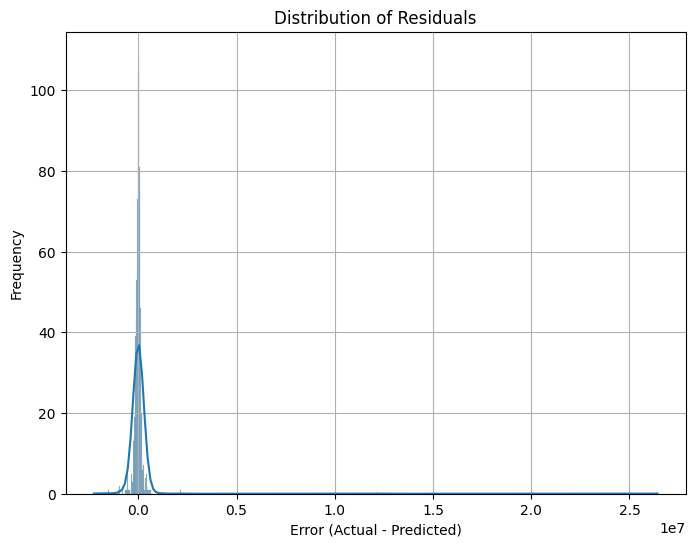

In [26]:
# Residual Plot (actual - predicted)
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()